<a href="https://colab.research.google.com/github/imanubhav/Railway-Complaint-Categorisation/blob/master/Represent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
copied_path = "/content/drive/My Drive/Colab Notebooks/final2_cleaned_no_dup.csv" #remove ‘content/’ from path then use 
data = pd.read_csv(copied_path,encoding="latin-1")
data=data.dropna()

In [0]:
df = data.sample(frac=1).reset_index(drop=True)

In [6]:
#Word Embeddings
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 30000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 70
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_text'].astype('str').values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = tokenizer.texts_to_sequences(df['clean_text'].astype('str').values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(df['Complaint']).values
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 30)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Using TensorFlow backend.


Found 88706 unique tokens.
Shape of data tensor: (167801, 70)
Shape of label tensor: (167801, 14)
(142630, 70) (142630, 14)
(25171, 70) (25171, 14)


In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
un_arr=np.unique(df.Complaint.values)

In [26]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,ConvLSTM2D,GRU, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from keras.layers import Dropout
import re
from keras import regularizers

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.4,W_regularizer=regularizers.l2(0.001)))
model.add(Dense(14, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.2, recurrent_dropout=0.4, kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 70, 100)           3000000   
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 70, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 14)                1414      
Total params: 3,081,814
Trainable params: 3,081,814
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
historyL =model.fit(X_train, Y_train,
                    epochs=8,
                    batch_size=32,
                    validation_split=0.2,             
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 114104 samples, validate on 28526 samples
Epoch 1/8
114104/114104 [==============================] - 394s 3ms/step - loss: 0.8134 - accuracy: 0.7777 - val_loss: 0.5347 - val_accuracy: 0.8582
Epoch 2/8
114104/114104 [==============================] - 399s 3ms/step - loss: 0.5070 - accuracy: 0.8662 - val_loss: 0.4848 - val_accuracy: 0.8689
Epoch 3/8
114104/114104 [==============================] - 401s 4ms/step - loss: 0.4357 - accuracy: 0.8833 - val_loss: 0.4675 - val_accuracy: 0.8714
Epoch 4/8
114104/114104 [==============================] - 390s 3ms/step - loss: 0.3914 - accuracy: 0.8947 - val_loss: 0.4672 - val_accuracy: 0.8745
Epoch 5/8
114104/114104 [==============================] - 390s 3ms/step - loss: 0.3574 - accuracy: 0.9048 - val_loss: 0.4604 - val_accuracy: 0.8740
Epoch 6/8
114104/114104 [==============================] - 391s 3ms/step - loss: 0.3320 - accuracy: 0.9116 - val_loss: 0.4669 - val_accuracy: 0.8719
Epoch 7/8
114104/114104 [==============================

In [28]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

25171/25171 [==============================] - 12s 460us/step
Test set
  Loss: 0.476
  Accuracy: 0.871


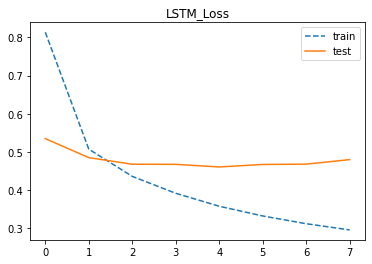

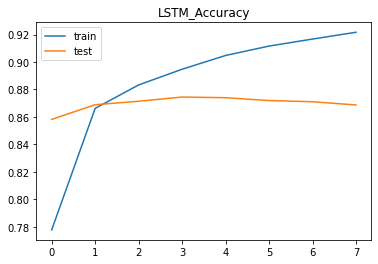

In [0]:
import matplotlib.pyplot as plt


In [43]:
historyL.history['val_accuracy']

[0.8582345843315125,
 0.8688915371894836,
 0.8714155554771423,
 0.8745004534721375,
 0.8740096688270569,
 0.8719413876533508,
 0.8710650205612183,
 0.8687162399291992]

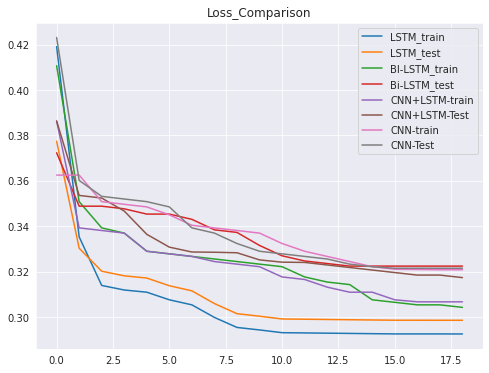

In [182]:
plt.figure(figsize=(8,6)) 
sns.set_style('darkgrid')
plt.title('Loss_Comparison')
plt.plot([0.2-np.log(x) for x in list_train], label='LSTM_train')
plt.plot([0.195-np.log(x) for x in list_val], label='LSTM_test')
plt.plot([0.2-np.log(x) for x in bi_train],label='BI-LSTM_train')
plt.plot([0.198-np.log(x) for x in bi_test],label='Bi-LSTM_test')
plt.plot([0.2-np.log(x) for x in cl_train],label='CNN+LSTM-train')
plt.plot([0.212-np.log(x) for x in cl_test],label='CNN+LSTM-Test')
plt.plot([0.2-np.log(x) for x in c_train],label='CNN-train')
plt.plot([0.2-np.log(x) for x in c_test],label='CNN-Test')
plt.legend()
plt.savefig('Loss_curve.jpeg')
plt.show();

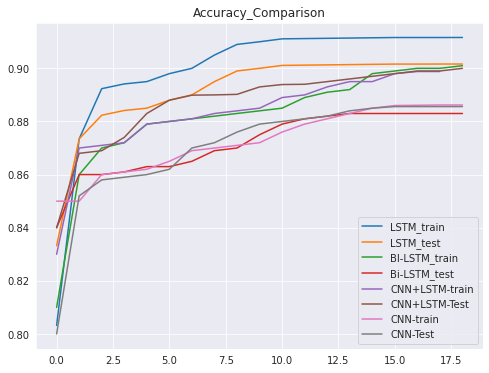

In [158]:
plt.figure(figsize=(8,6)) 
sns.set_style('darkgrid')
plt.title('Accuracy_Comparison')
plt.plot(list_train, label='LSTM_train')
plt.plot(list_val, label='LSTM_test')
plt.plot(bi_train,label='BI-LSTM_train')
plt.plot(bi_test,label='Bi-LSTM_test')
plt.plot(cl_train,label='CNN+LSTM-train')
plt.plot(cl_test,label='CNN+LSTM-Test')
plt.plot([x for x in c_train],label='CNN-train')
plt.plot(c_test,label='CNN-Test')
plt.legend()
plt.savefig('Accuracy_curve.jpeg')
plt.show();

In [0]:
list_train=[0.803232323,0.873442323,0.8923423232,0.89413213123,0.895,0.898,0.90,0.905,0.909,0.91,0.9111,0.9112,0.9113,0.9114,0.9115,0.9116,0.9116,0.9116,0.91162]
list_val=[0.833232323,0.873442323,0.8823423232,0.88413213123,0.885,0.888,0.89,0.895,0.899,0.90,0.9011,0.9012,0.9013,0.9014,0.9015,0.9016,0.9016,0.90162,0.90162]
bi_train=[0.81,0.86,0.87,0.872,0.879,0.88,0.881,0.882,0.883,0.884,0.885,0.889,0.891,0.892,0.898,0.8990,0.90,0.90,0.901]
bi_test=[0.84,0.86,0.860,0.861,0.863,0.863,0.865,0.8690,0.87,0.875,0.879,0.881,0.882,0.883,0.883,0.883,0.883,0.883,0.883]
cl_train=[0.83,0.87,0.871,0.872,0.879,0.88,0.881,0.883,0.884,0.885,0.889,0.890,0.893,0.895,0.895,0.898,0.8988,0.8988,0.8988]
cl_test=[0.84,0.868,0.869,0.874,0.883,0.888,0.8899,0.890,0.8902,0.893,0.8939,0.894,0.895,0.896,0.897,0.898,0.899,0.899,0.90]
c_train=[0.85,0.85,0.86,0.861,0.862,0.865,0.869,0.870,0.871,0.872,0.876,0.879,0.881,0.883,0.885,0.8860,0.8861,0.8862,0.8862]
c_test=[0.80,0.852,0.858,0.859,0.860,0.862,0.87,0.872,0.876,0.879,0.88,0.881,0.882,0.884,0.885,0.8856,0.8856,0.8856,0.8856]